In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('FWI Dataset.csv')
print("Loaded the dataset into a Pandas Dataframe")
df

Loaded the dataset into a Pandas Dataframe


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [3]:
#print("data types of the dataset")
#display(df.dtypes)
df.columns = df.columns.str.strip()

#for col in df.select_dtypes(include='object').columns:
#    df[col] = df[col].astype(str).str.strip()

df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [4]:
display(df.head())
display(df.tail())
print("Shape of dataset:")
display(df.shape)
print("Info of dataset:")
display(df.info())

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


Shape of dataset:


(244, 15)

Info of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


None

In [5]:
print("Missing values:")
display(df.isnull().sum())

Missing values:


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

In [6]:
df.columns = df.columns.str.strip()
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])
df['FWI']=df['FWI'].fillna(df['FWI'].mode()[0])
df['DC']=df['DC'].fillna(df['DC'].mode()[0])
display(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [7]:
print("finding duplicates:")
df.duplicated().sum

print("garbage values")
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

finding duplicates:
garbage values
Classes
fire             132
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64
******************************
Region
Bejaia            122
Sidi-Bel Abbes    122
Name: count, dtype: int64
******************************


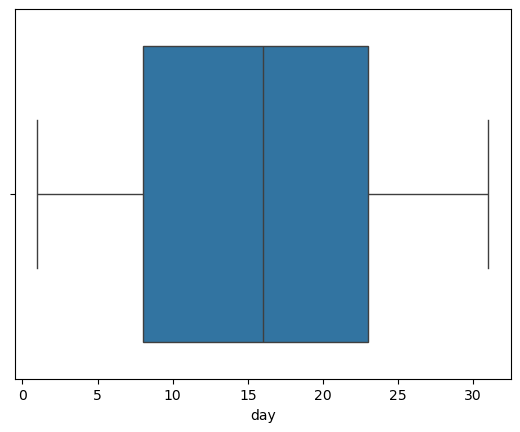

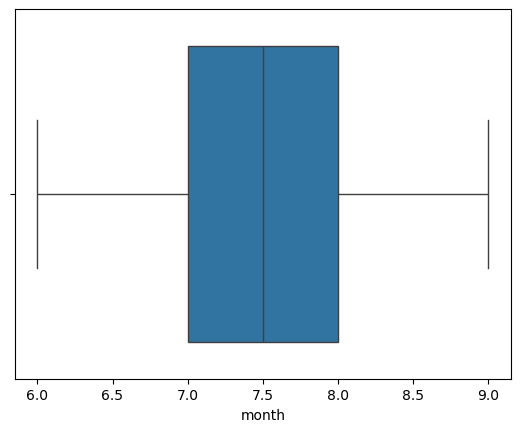

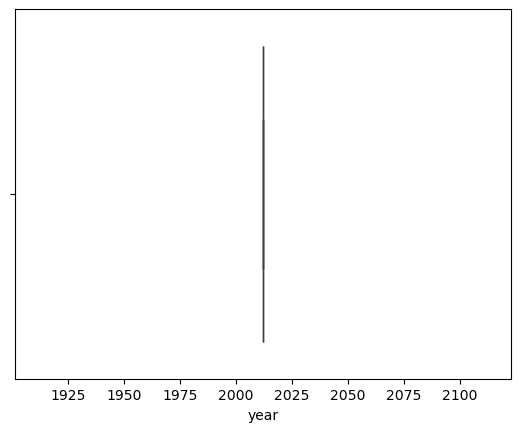

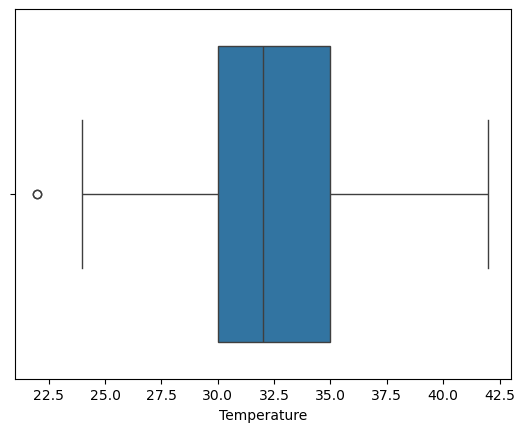

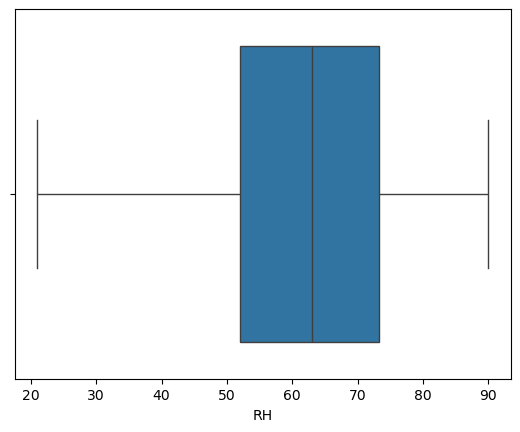

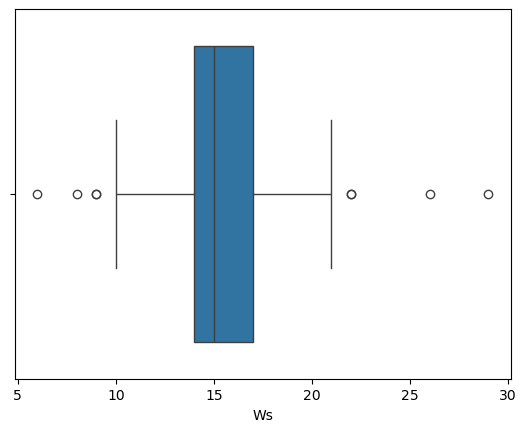

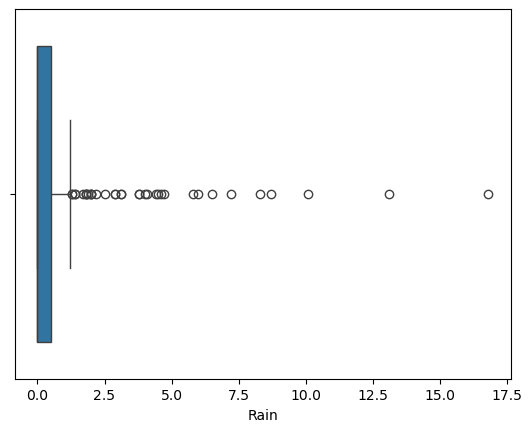

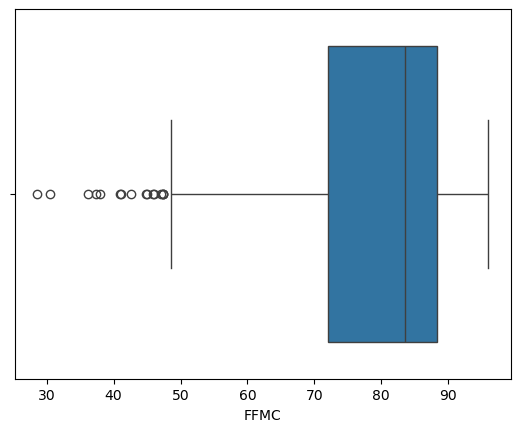

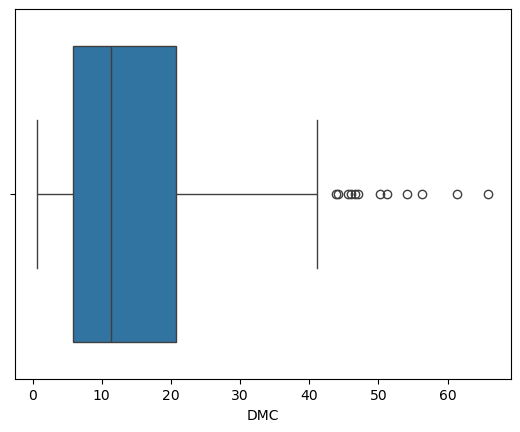

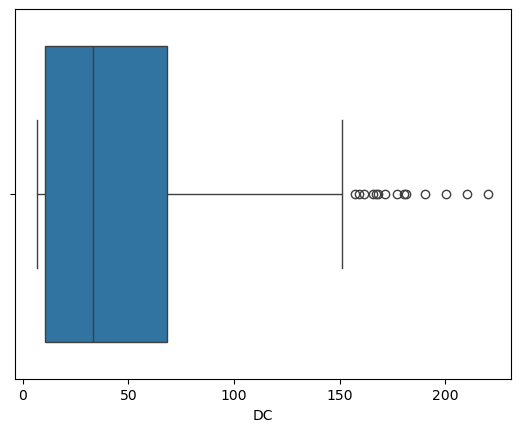

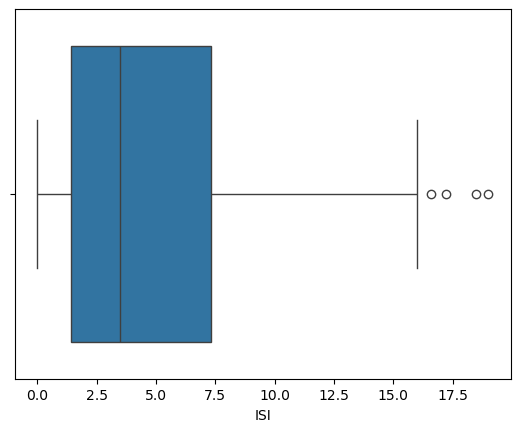

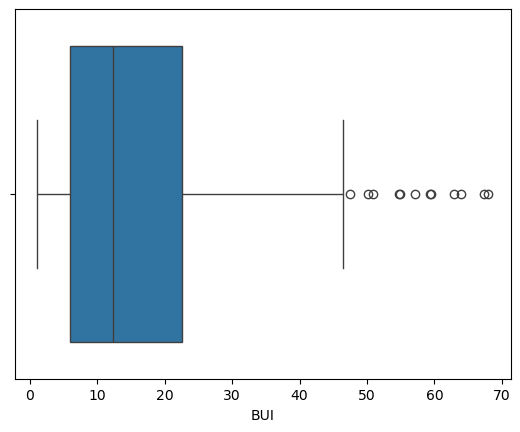

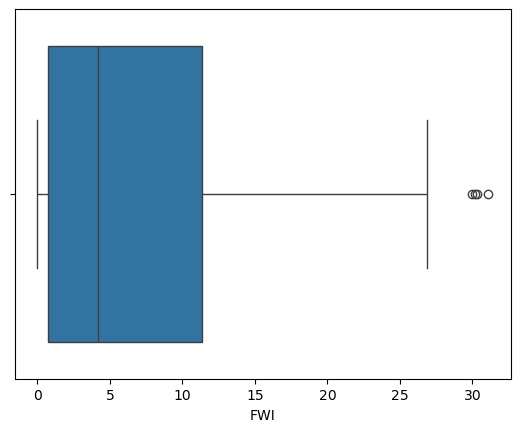

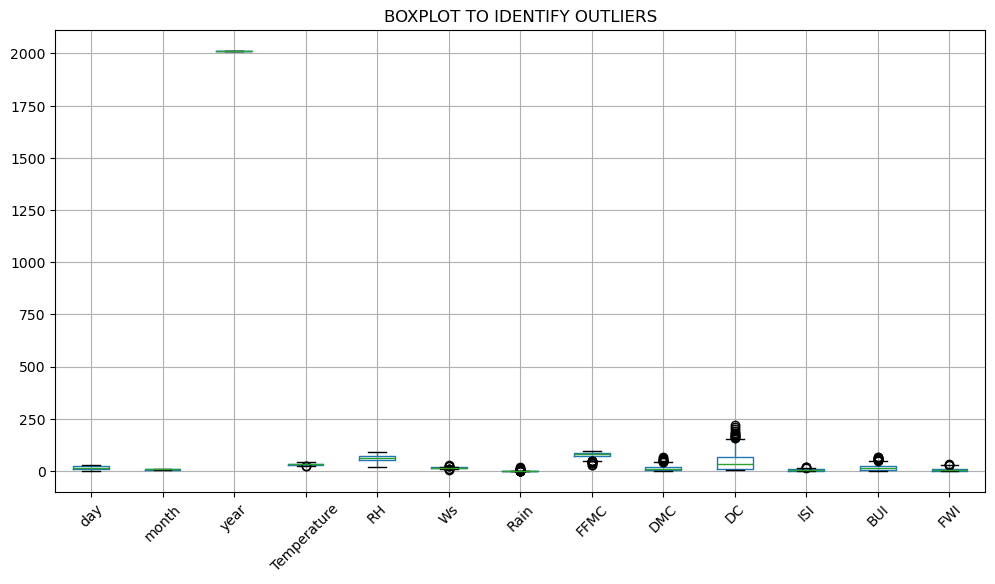

In [8]:
####### MODULE-2 #######
##BOXPLOT-TO IDENTIFY OUTLIER DETECTION
#BOX PER COLUMN
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

#BOX IN SINGLE PLOT

plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title("BOXPLOT TO IDENTIFY OUTLIERS")
plt.show()

In [9]:
# ---- Identify numeric columns ----
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# ---- Custom function to catch outliers using IQR ----
def find_iqr_outliers(frame, feature):
    q1_val = frame[feature].quantile(0.25)
    q3_val = frame[feature].quantile(0.75)
    iqr_range = q3_val - q1_val

    lower_cut = q1_val - (1.5 * iqr_range)
    upper_cut = q3_val + (1.5 * iqr_range)

    detected = frame[(frame[feature] < lower_cut) | (frame[feature] > upper_cut)]
    return detected


# ---- Loop through numeric columns and show results ----
for feature in numeric_features:
    outlier_rows = find_iqr_outliers(df, feature)
    print(f"{feature} → Outlier Count: {len(outlier_rows)}")

day → Outlier Count: 0
month → Outlier Count: 0
year → Outlier Count: 0
Temperature → Outlier Count: 2
RH → Outlier Count: 0
Ws → Outlier Count: 8
Rain → Outlier Count: 35
FFMC → Outlier Count: 16
DMC → Outlier Count: 12
DC → Outlier Count: 14
ISI → Outlier Count: 4
BUI → Outlier Count: 12
FWI → Outlier Count: 4


Before dropping: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
After dropping: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
histogram to understand the distribution


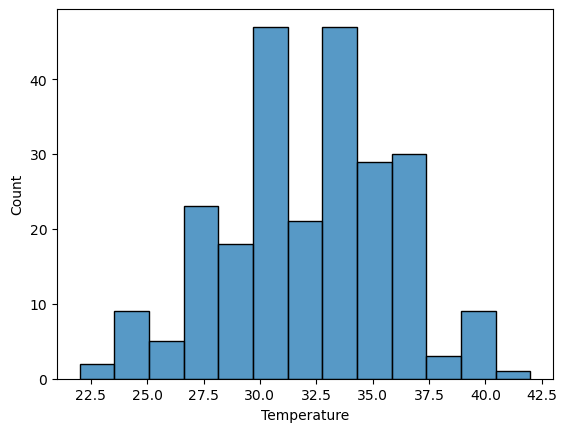

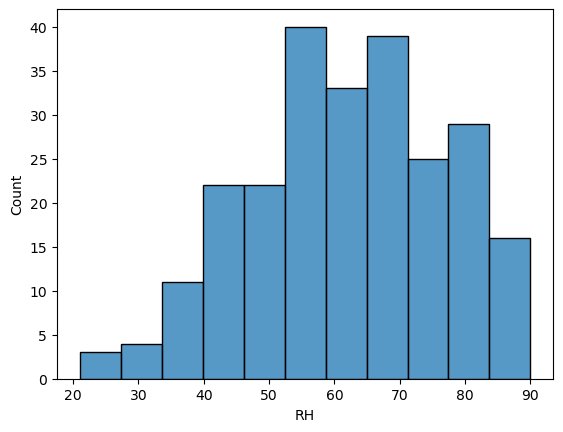

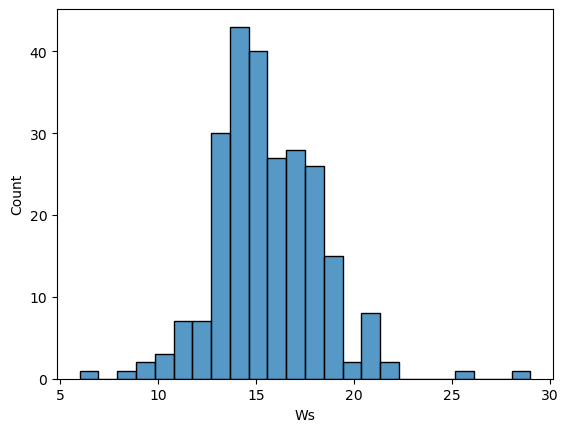

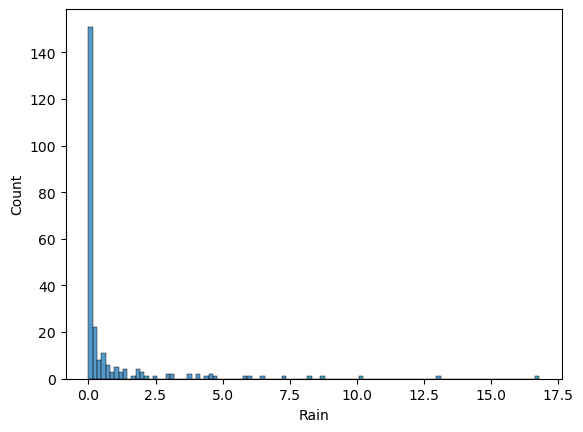

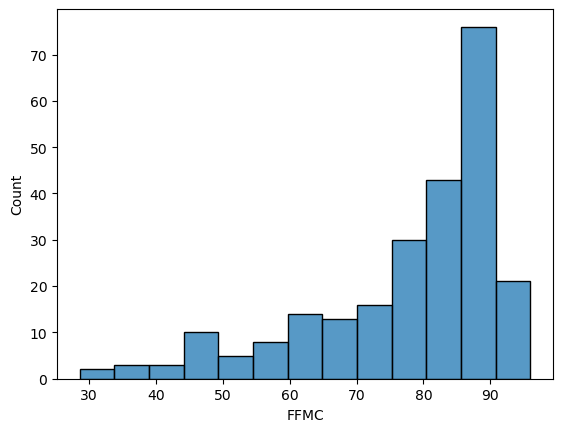

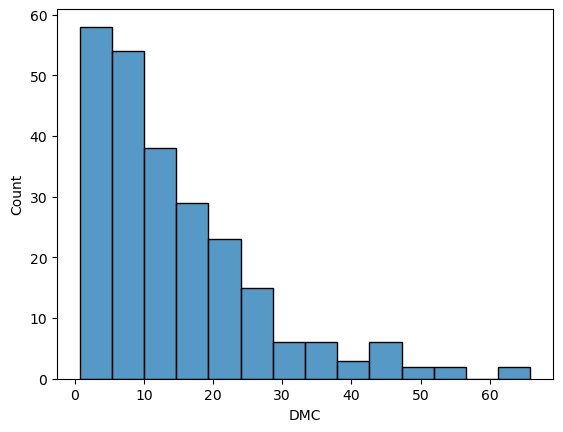

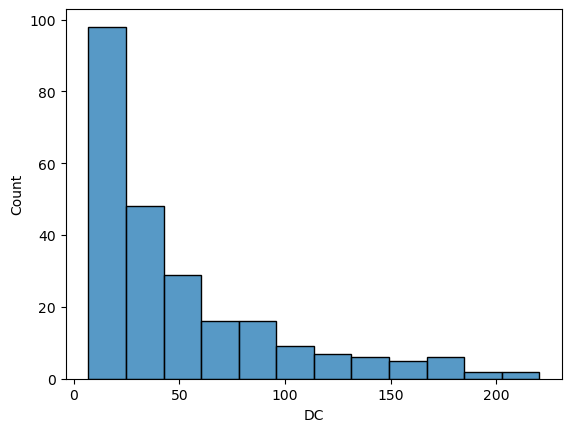

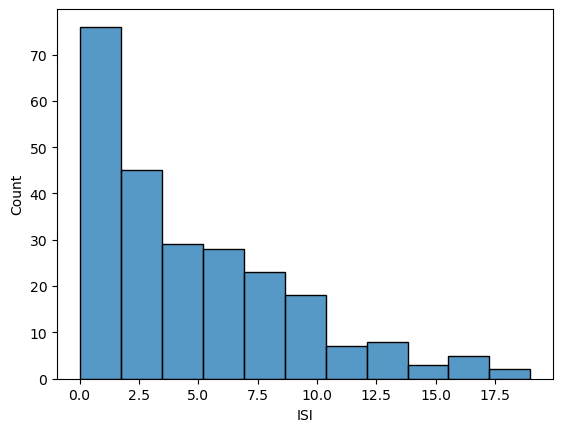

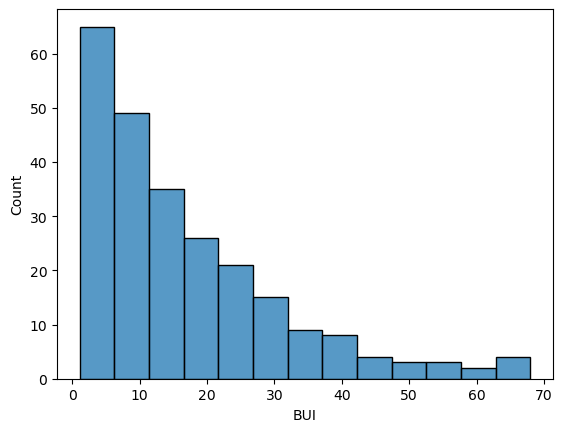

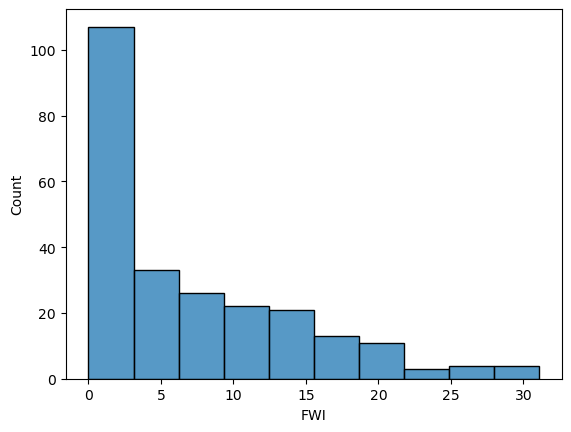

In [10]:
###EDA####
#display(df)
# View columns
print("Before dropping:", df.columns.tolist())

# Drop date columns safely
df.drop(columns=['day', 'month', 'year'], errors='ignore', inplace=True)

print("After dropping:", df.columns.tolist())
df.describe()
df.describe(include="object")
print("histogram to understand the distribution")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

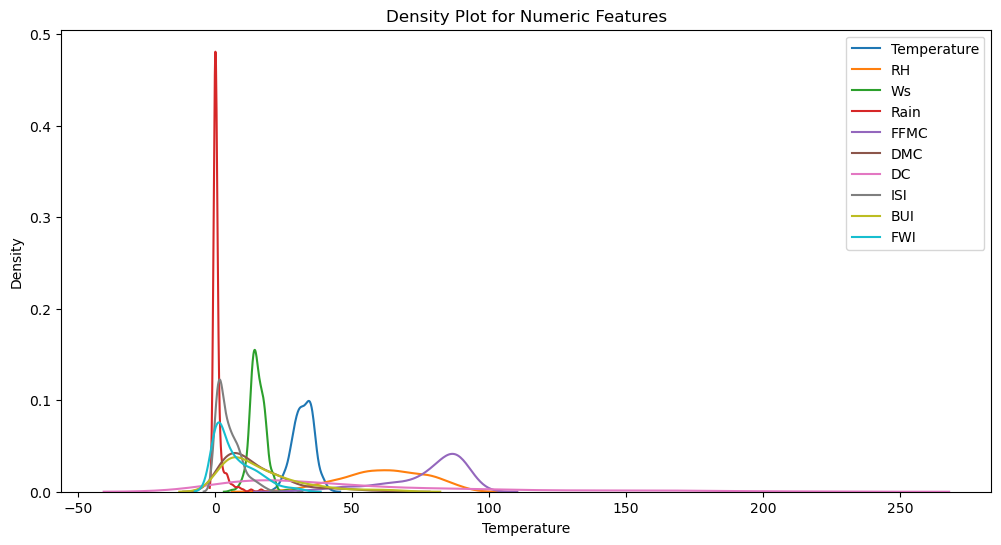

In [13]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,6))
for col in numeric_cols:
    sns.kdeplot(df[col], label=col)

plt.title("Density Plot for Numeric Features")
plt.legend()
plt.show()

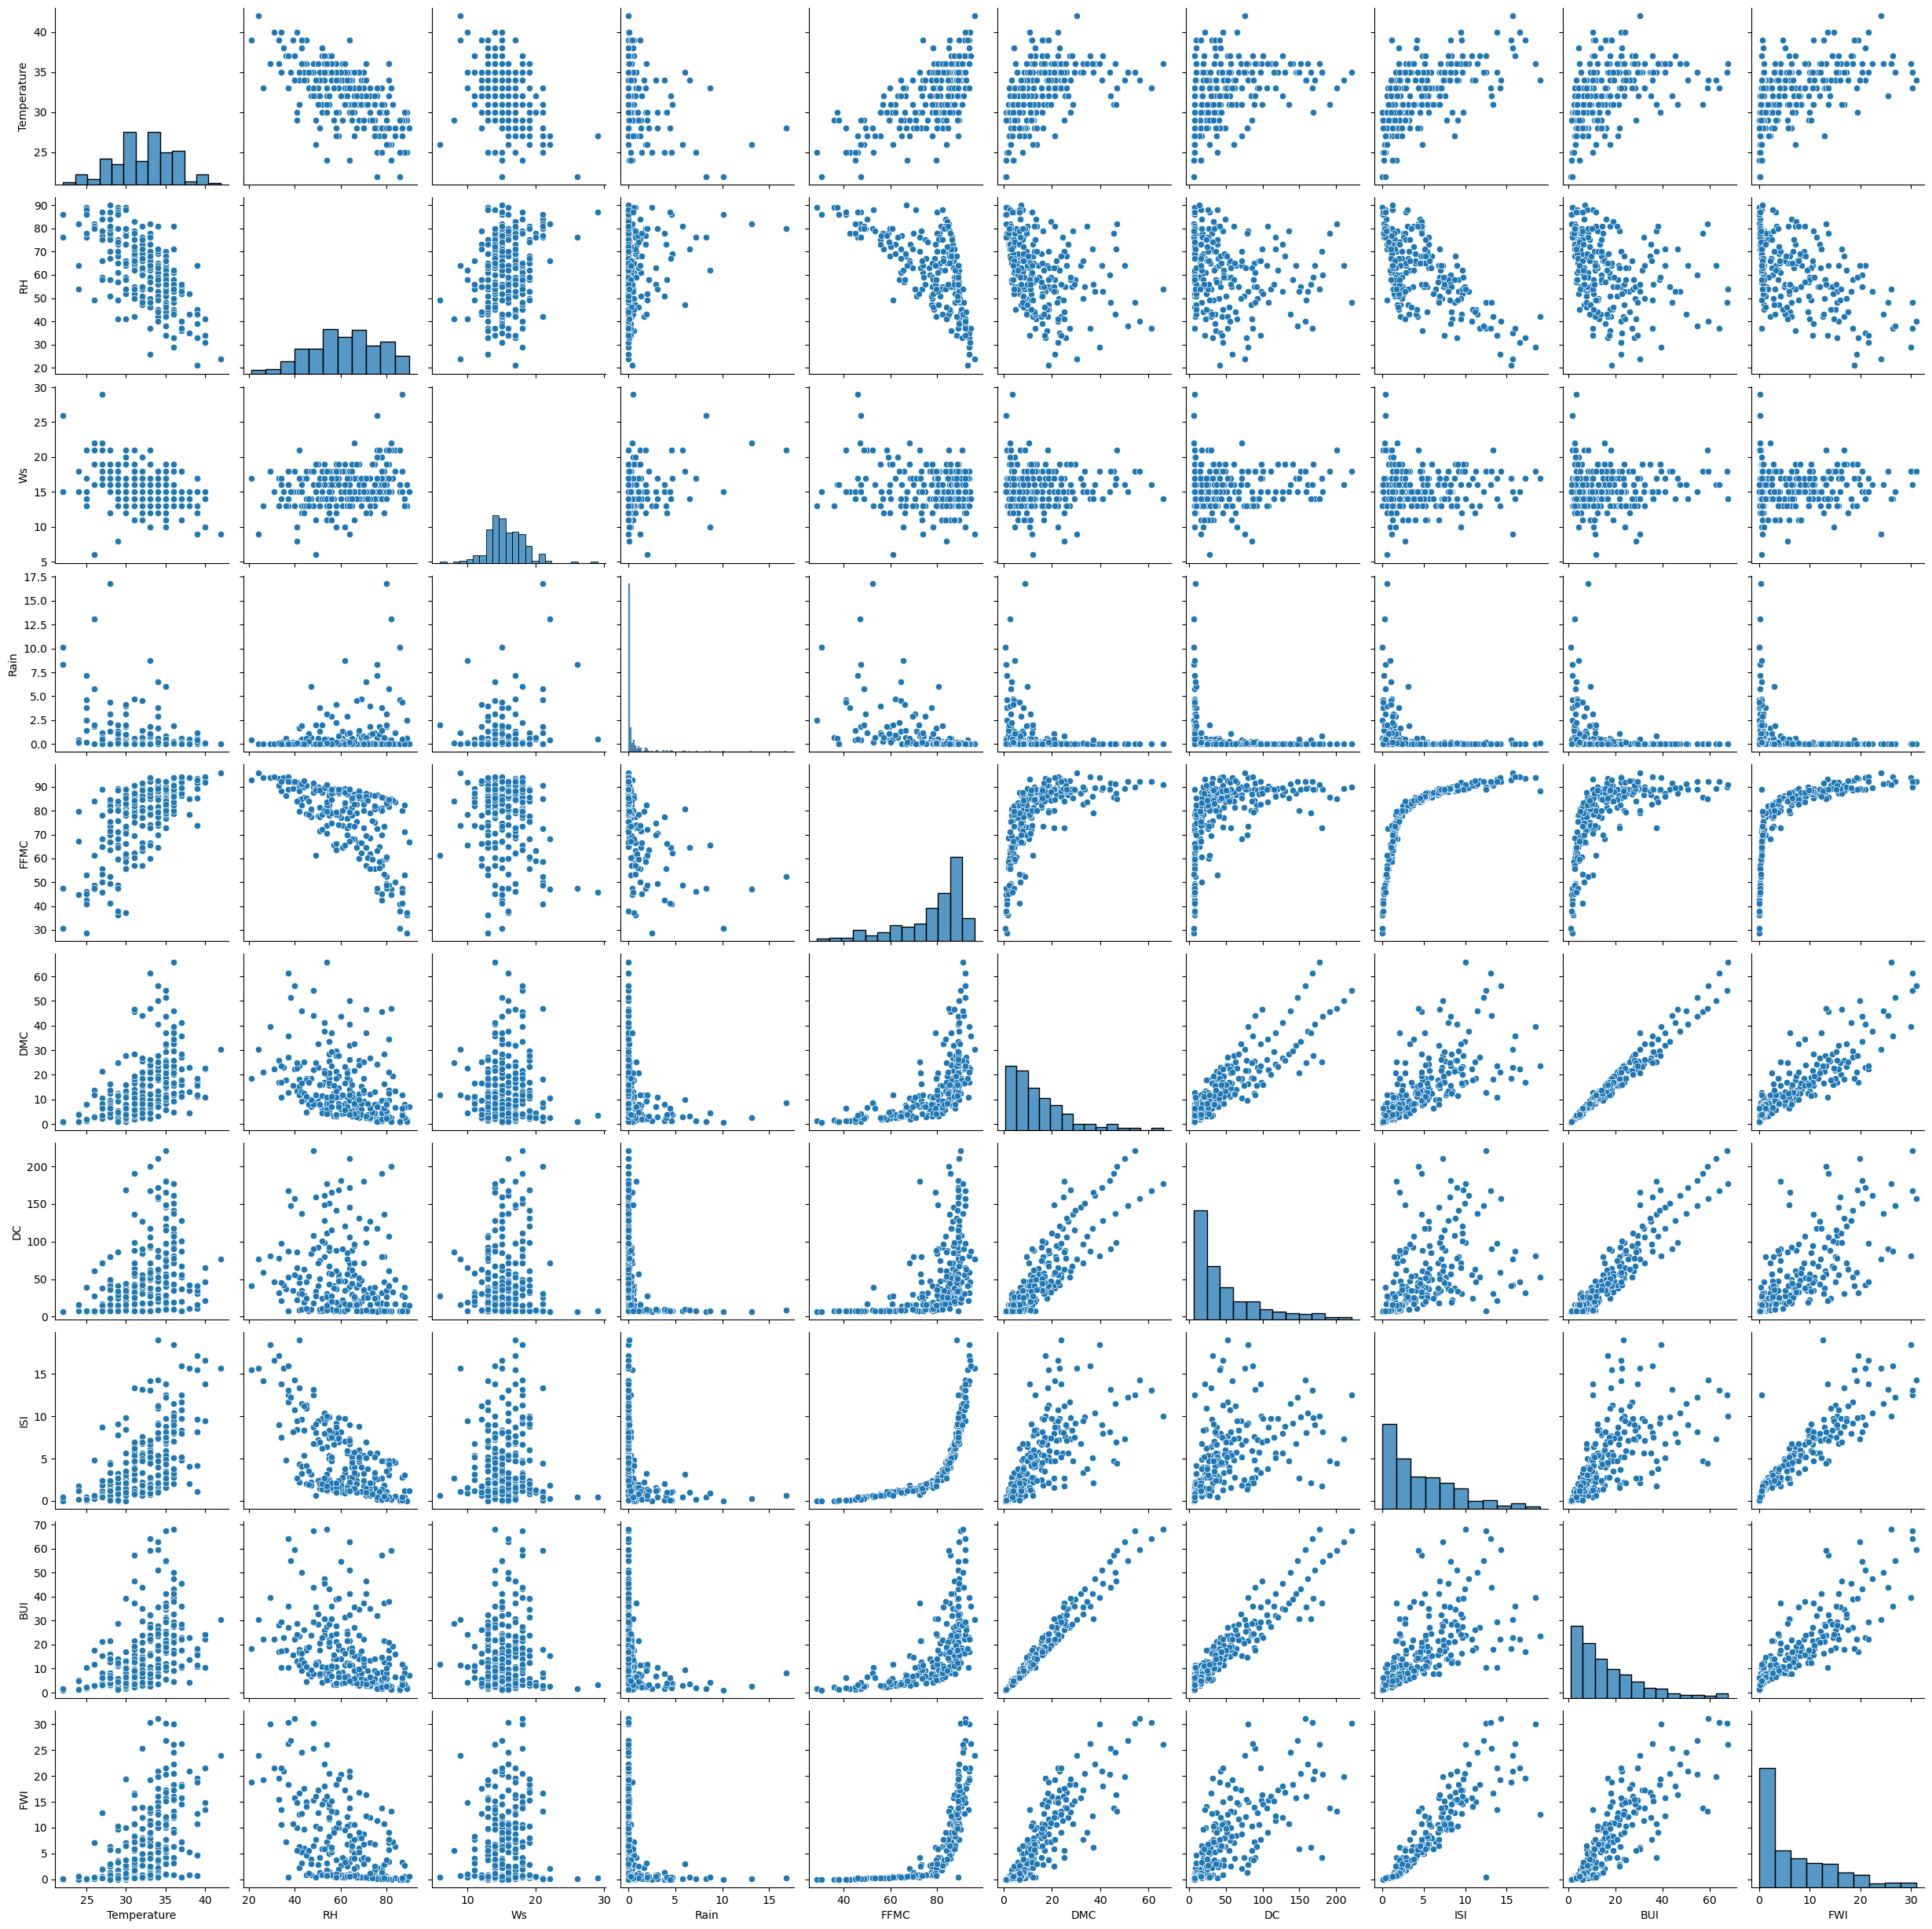

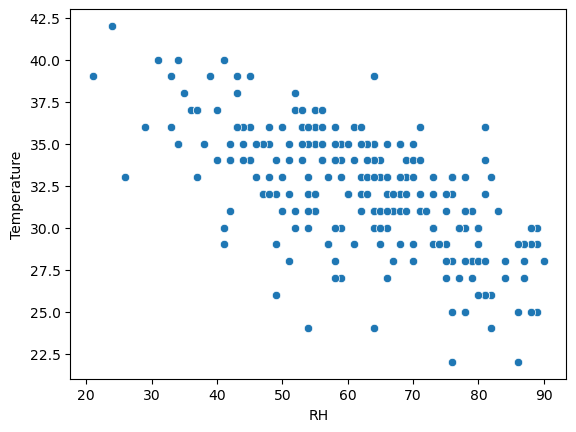

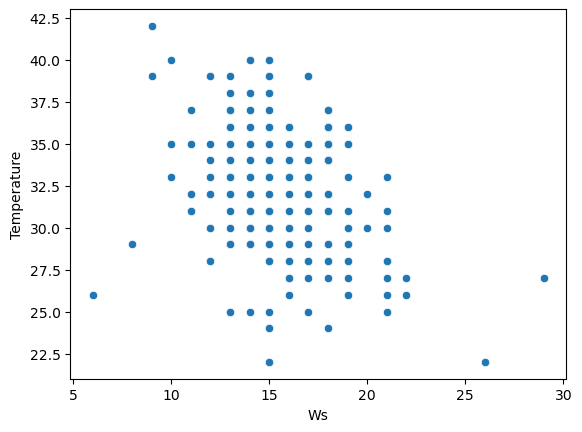

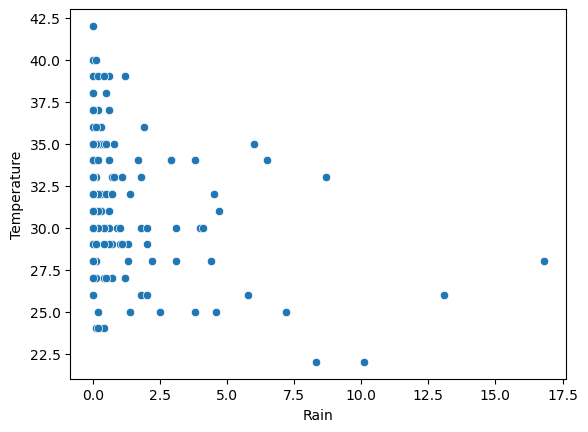

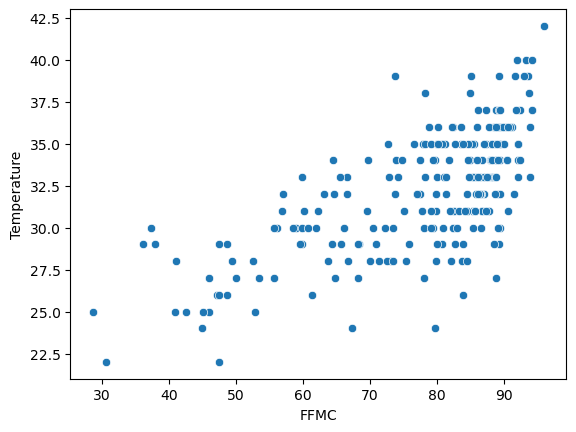

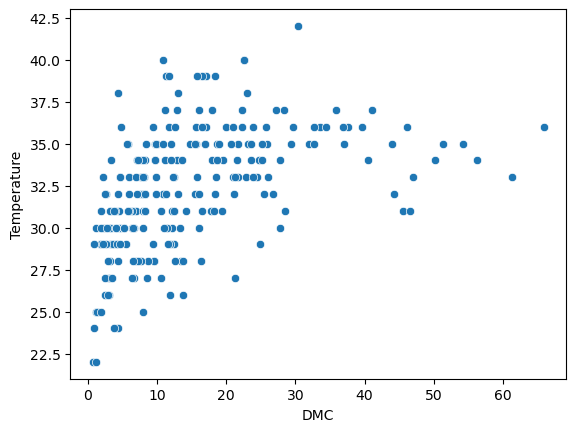

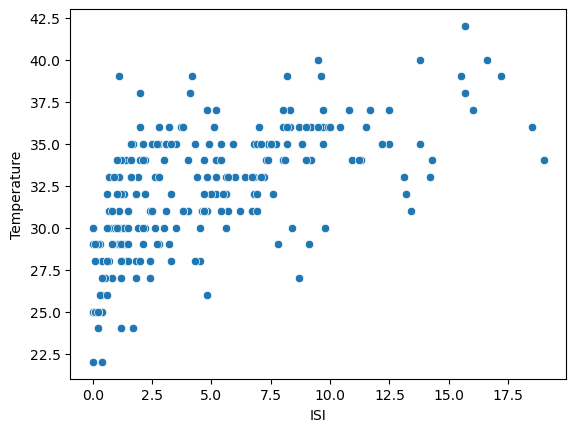

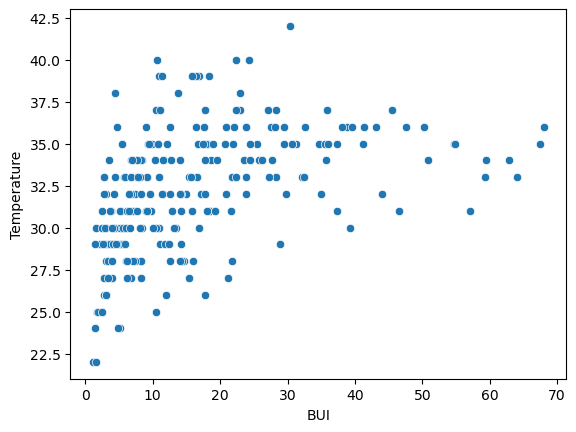

In [14]:
###EXPLORED RELATIONSHIPS 
##SCATTERPLOT to understand the relationship
sns.pairplot(df.select_dtypes(include='number'))
plt.show()


df.select_dtypes(include="number").columns
for i in ['RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'ISI', 'BUI']:
    sns.scatterplot(data=df,x=i,y='Temperature')
    plt.show()

<Axes: >

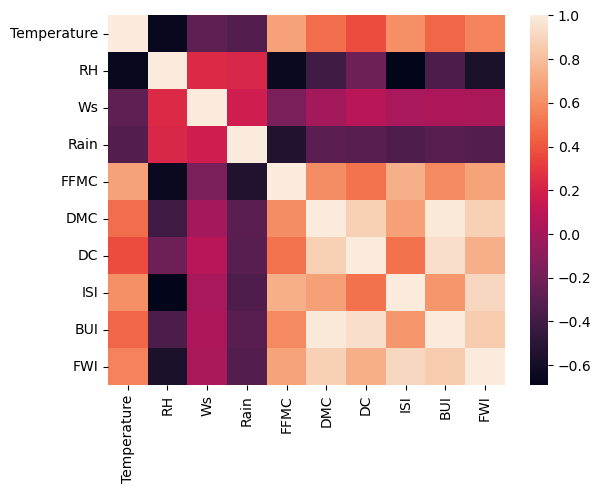

In [15]:
#CORRELATION WITH HEATMAP
s=df.select_dtypes(include="number").corr()
sns.heatmap(s)

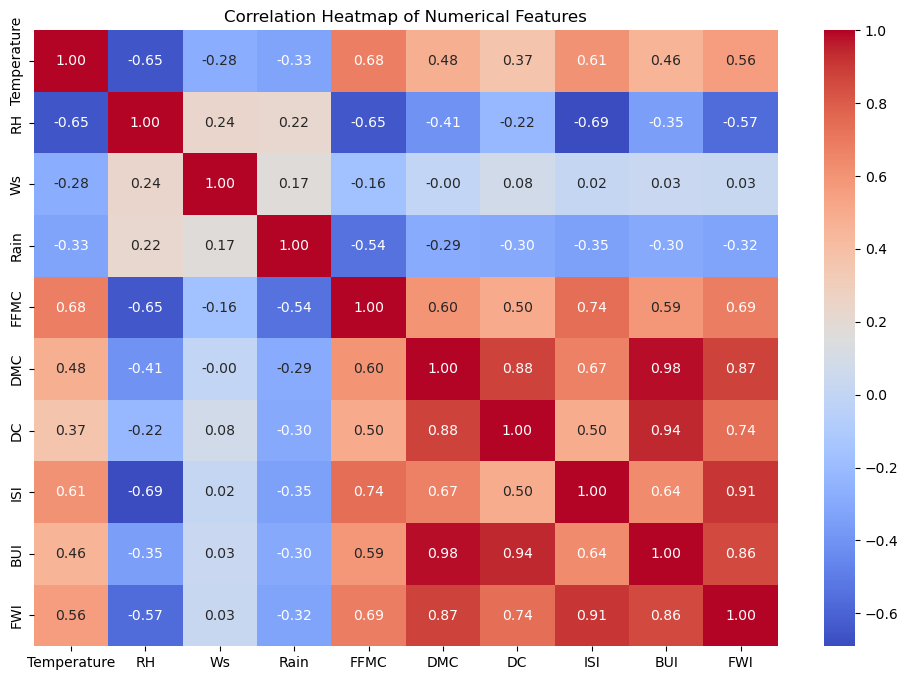

In [16]:
#CORRELATION MATRIX
num_features = df.select_dtypes(include=['float64', 'int64']).columns
corr_map = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_map, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [17]:
####• Encoded categorical values like Region using label encoding or mapping.
####categorical value=region and classes
from sklearn.preprocessing import LabelEncoder

# Clean text columns (important)
df['Classes'] = df['Classes'].str.strip()
df['Region'] = df['Region'].str.strip()

class_encoder = LabelEncoder()
region_encoder = LabelEncoder()

# Apply label encoding
df['Classes_Encoded'] = class_encoder.fit_transform(df['Classes'])
df['Region_Encoded'] = region_encoder.fit_transform(df['Region'])

# Display mappings
print("Classes Mapping:",dict(zip(class_encoder.classes_,class_encoder.transform(class_encoder.classes_))))

print("Region Mapping:",dict(zip(region_encoder.classes_,region_encoder.transform(region_encoder.classes_))))

#convert to categorical dtype
df['Classes_Encoded'] = df['Classes_Encoded'].astype('category')
df['Region_Encoded'] = df['Region_Encoded'].astype('category')

df.head()

Classes Mapping: {'fire': np.int64(0), 'not fire': np.int64(1)}
Region Mapping: {'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Encoded,Region_Encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1,0


In [18]:
#Saved the cleaned dataset using modelling

df.to_csv("FWI_Cleaned.csv", index=False)
display(df.head())

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Encoded,Region_Encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1,0


In [19]:
######## MODULE-3 #########
#Module 3: Feature Engineering and Scaling
df = pd.read_csv('FWI_Cleaned.csv')
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_Encoded,Region_Encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,0,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes,1,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,1,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,1,1


In [20]:
df.columns = df.columns.str.strip()
df.drop(columns=['day','month','year','Region_Encoded','Classes_Encoded'], inplace=True, errors='ignore')


In [21]:
numeric_df = df.select_dtypes(include='number')

print("\nNumeric columns used for correlation:")
print(numeric_df.columns.tolist())
#Correlation analysis with FWI (target variable)
# --------------------------------------------------
fwi_corr = numeric_df.corr()['FWI'].sort_values(ascending=False)
print("\nCorrelation of features with FWI:\n")
print(fwi_corr)

# 7. Select key input features most correlated with FWI
# (threshold can be adjusted)
selected_features = fwi_corr[abs(fwi_corr) >=0.3].drop('FWI')

print("\nSelected key input features most correlated with FWI:")
print(list(selected_features.index))


Numeric columns used for correlation:
['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

Correlation of features with FWI:

FWI            1.000000
ISI            0.908054
DMC            0.874924
BUI            0.857847
DC             0.740348
FFMC           0.686342
Temperature    0.558800
Ws             0.029001
Rain          -0.322810
RH            -0.570483
Name: FWI, dtype: float64

Selected key input features most correlated with FWI:
['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'Temperature', 'Rain', 'RH']


In [23]:
# Convert selected_features to list 
selected_features = list(selected_features.index)

print(type(selected_features))  
print(selected_features)
if 'Ws' in df.columns and 'Ws' not in selected_features:
    selected_features.append('Ws')
print("Final features:", selected_features)

<class 'list'>
['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'Temperature', 'Rain', 'RH']
Final features: ['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'Temperature', 'Rain', 'RH', 'Ws']


In [24]:
from sklearn.preprocessing import StandardScaler

# Define input features (X) and target (y)
X = df[selected_features]
y = df['FWI']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform input features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display result
print("Normalized features (first 5 rows):")
display(X_scaled.head())

Normalized features (first 5 rows):


,ISI,DMC,BUI,DC,FFMC,Temperature,Rain,RH,Ws
0,-0.833786,-0.913365,-0.935740,-0.876271,-0.851801,-0.874735,-0.381223,-0.332478,0.889990
1,-0.905784,-0.856651,-0.900468,-0.876271,-0.942658,-0.874735,0.270307,-0.063185,-0.892913
2,-1.073781,-0.986283,-0.985120,-0.886788,-2.151758,-1.702005,6.184192,1.350607,2.316313
3,-1.145779,-1.083506,-1.055663,-0.890994,-3.444727,-1.977761,0.871719,1.821872,-0.892913
4,-0.857785,-0.945773,-0.900468,-0.737451,-0.914702,-1.426248,-0.381223,1.013990,0.176829


In [25]:
##Split into X and y
X = df[selected_features].copy()
display('selected_features',X)
y = df['FWI'].copy()
display('Target variable',y)

'selected_features'

,ISI,DMC,BUI,DC,FFMC,Temperature,Rain,RH,Ws
0,1.3,3.4,3.4,7.6,65.7,29,0.0,57,18
1,1.0,4.1,3.9,7.6,64.4,29,1.3,61,13
2,0.3,2.5,2.7,7.1,47.1,26,13.1,82,22
3,0.0,1.3,1.7,6.9,28.6,25,2.5,89,13
4,1.2,3.0,3.9,14.2,64.8,27,0.0,77,16
...,...,...,...,...,...,...,...,...,...
239,4.5,16.0,16.9,44.5,85.4,30,0.0,65,14
240,0.1,6.5,6.2,8.0,41.1,28,4.4,87,15
241,0.4,3.5,3.4,7.9,45.9,27,0.5,87,29
242,1.7,4.3,5.1,15.2,79.7,24,0.1,54,18


'Target variable'

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [29]:
#Train-test split
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Shapes — X_train:", X_train.shape, "X_test:", X_test.shape)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Shapes — X_train: (195, 9) X_test: (49, 9)
Training set shape: (195, 9) (195,)
Testing set shape: (49, 9) (49,)


In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Fit scaler on training data
import pickle
scaler = StandardScaler()
scaler.fit(X_train)

# Save scaler
with open("standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
print("Scaler saved successfully as scaler.pkl")

Scaler saved successfully as scaler.pkl


In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import pickle

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}
# training and evaluating
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,"R2 SCORE":r2,
    })
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,MAE,R2 SCORE
0,Linear Regression,0.734458,0.545628,0.986160
1,Ridge Regression,0.735642,0.546639,0.986115
2,Lasso Regression,1.025279,0.771789,0.973030
3,ElasticNet Regression,1.008067,0.758938,0.973928
4,Random Forest Regression,0.735049,0.474163,0.986138


In [45]:
# Alpha tuning (bias-variance tradeoff)
alphas = [0.01, 0.1, 1, 10, 100]

print("\nAlpha tuning results:")
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    
    preds = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    print(f"Alpha: {a} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2 Score: {r2:.4f}")


Alpha tuning results:
Alpha: 0.01 | RMSE: 0.7343 | MAE: 0.5454 | R2 Score: 0.9862
Alpha: 0.1 | RMSE: 0.7330 | MAE: 0.5436 | R2 Score: 0.9862
Alpha: 1 | RMSE: 0.7430 | MAE: 0.5498 | R2 Score: 0.9858
Alpha: 10 | RMSE: 0.9812 | MAE: 0.7383 | R2 Score: 0.9753
Alpha: 100 | RMSE: 2.0005 | MAE: 1.4994 | R2 Score: 0.8973


In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

final_model = Ridge(alpha=1.0)
final_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

# Training performance
print("Training Performance")
print("R2 Score:", r2_score(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE:", mean_absolute_error(y_train, y_train_pred))

# Validation performance
print("\nValidation Performance")
print("R2 Score:", r2_score(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))

Training Performance
R2 Score: 0.955971975921951
RMSE: 1.6087501930159265
MAE: 0.7990999170098881

Validation Performance
R2 Score: 0.9858373639512478
RMSE: 0.7429685971605202
MAE: 0.5498269131442202


In [57]:
final_model = Ridge(alpha=1.0)
final_model.fit(X_train_scaled, y_train)


Ridge()

In [58]:
# Save trained Ridge model
with open("ridge.pkl", "wb") as file:
    pickle.dump(final_model, file)
print("done")

done
